Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Reading Data

In [2]:
df = pd.read_csv('data1.csv')
df

,x,y
0,17,94
1,13,73
2,12,59
3,15,80
4,16,93
...,...,...
115,14,85
116,16,66
117,16,79
118,18,77


Building Linear Regression Model From Scratch

In [3]:
def ABS(x):
    if(x > 0):
        return x
    return -x
def Linear_Regression(df):
    x_MAX = None
    x_MIN = None
    x_mean = 0
    y_mean = 0
    N = len(df)
    for i in range(0,N):
        x = df.iloc[i,0]
        if(x_MAX == None):
            x_MAX = x
        elif(x > x_MAX):
            x_MAX = x
        if(x_MIN == None):
            x_MIN = x
        elif(x < x_MIN):
            x_MIN = x
        y = df.iloc[i,1]
        x_mean = x + x_mean
        y_mean = y + y_mean
    x_mean = x_mean / N
    y_mean = y_mean / N
    numerator = 0
    denominator = 0
    for i in range(0,N):
        x = df.iloc[i,0]
        y = df.iloc[i,1]
        numerator = numerator + ((x * y) - (y_mean * x))
        denominator = denominator + ((x * x) - (x_mean * x))
    m = numerator / denominator
    c = y_mean - (m * x_mean)
    RMSE = 0
    MAE = 0
    for i in range(0,N):
        x = df.iloc[i,0]
        y = df.iloc[i,1]
        RMSE = RMSE + ((y - ((m * x) + c))**2)
        MAE = MAE + ABS(y - ((m * x) + c))
    RMSE = RMSE / N
    RMSE = RMSE**(0.5)
    MAE = MAE / N
    y_MIN = (m * x_MIN) + c
    y_MAX = (m * x_MAX) + c
    return m, c, RMSE, MAE, x_MIN, y_MIN, x_MAX, y_MAX

Obtaining the parameters computed

In [4]:
m, c, RMSE, MAE, x1, y1, x2, y2 = Linear_Regression(df)

Plotting the Graph

Text(0.5, 0, 'X')

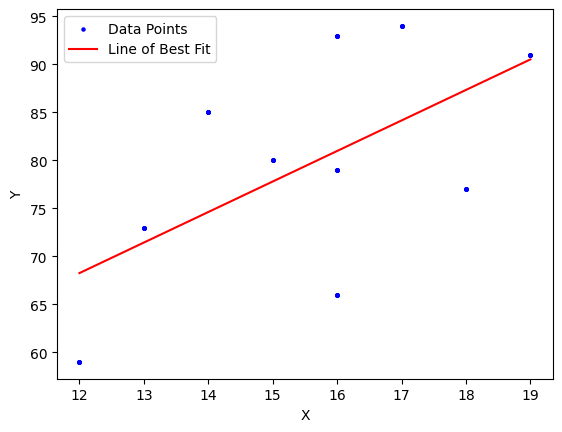

In [5]:
plt.figure()
plt.scatter(df.iloc[:,0],df.iloc[:,1],s=5,c='blue')
plt.plot([x1,x2],[y1,y2],color='red')
plt.legend(['Data Points','Line of Best Fit'])
plt.ylabel("Y")
plt.xlabel("X")

RMSE and MAE along with Line of Best fit coeficients found

In [6]:
print("Line equation is: y = " + str(m) + "*x + " + str(c))
print("Slope 'm' is: " + str(m))
print("Constant 'c' is: " + str(c))
print("RMSE: " + str(RMSE))
print("Mean Absolute Error: " + str(MAE))

Line equation is: y = 3.179245283018851*x + 30.10377358490593
Slope 'm' is: 3.179245283018851
Constant 'c' is: 30.10377358490593
RMSE: 8.817810022046611
Mean Absolute Error: 7.305660377358496
